In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def getData():
    fileString = "Dataset/Suicides.csv"
    Suicide_DS = pd.read_csv(fileString,encoding="latin1")
    
    return Suicide_DS

In [12]:
def groupAnalysis(frame):
    ByCountry = frame.groupby('country',as_index=False)['suicides_no'].sum()
    ByYearCountry  =  frame.groupby(['year','country'],as_index=False)['suicides_no'].sum()
    ByYear  =  frame.groupby('year',as_index=False)['suicides_no'].sum()

    
    return ByCountry,ByYearCountry,ByYear

In [29]:
def barChart(frame,argument):
    labels = frame[argument].to_list()
    plt.rcdefaults()
    
    y_pos = np.arange(len(labels))
    performance = frame['suicides_no'].to_list()
    fig, ax = plt.subplots()
    
    ax.barh(y_pos, performance, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Suicides Number')
    ax.set_title('Suicides by year')

    plt.show()

Argument for chart generationyear


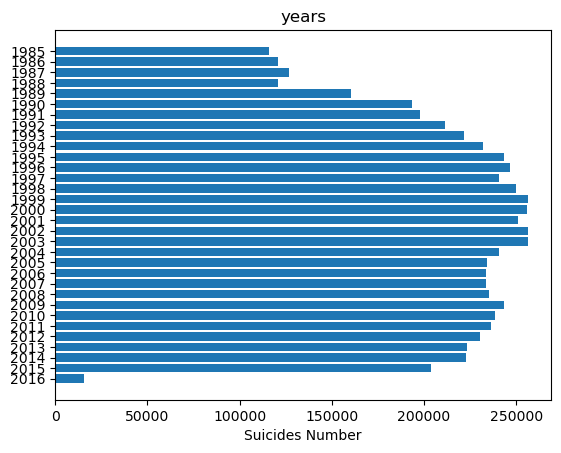

In [30]:
if __name__ == "__main__":
    Suicide_DF = getData()
    Suicide_DF = Suicide_DF.fillna(0)
    
    Country,Year_Country,Year = groupAnalysis(Suicide_DF)
    argument = input("Argument for chart generation")
    
    barChart(Year,argument)
    

,year,country,suicides_no
0,1985,Antigua and Barbuda,0
1,1985,Argentina,1988
2,1985,Australia,1861
3,1985,Austria,2091
4,1985,Bahamas,1
...,...,...,...
2316,2016,Netherlands,1886
2317,2016,Qatar,68
2318,2016,Romania,1953
2319,2016,Sweden,1130
